In [1]:
import pickle
import sys
import os
sys.path.append("/".join(os.getcwd().split("/")[:-1]))
sys.path.append("/".join(os.getcwd().split("/")[:-2]))
import common
import torch
from sparsity_levels import *
from tqdm import tqdm

checkpoint_path = "/local/huzaifa/CoreInfer/models/llama3-3b"
dir_path = "/local/huzaifa/CoreInfer/sparsity_levels/llama3-3b/sparsity_levels_files"
model_name = "llama3-3b"
num_neurons = common.MODEL_INFO[model_name]["num_neurons"]
model, tokenizer, num_layers = common.load_model(model_name, 5, 27, checkpoint_path, "cpu", None)

/local/huzaifa/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


Done. Loaded model in 20.79 seconds.



## TruthfulQA

In [3]:
with open("/local/huzaifa/CoreInfer/ignore/activations/truthful_qa_llama3-3b_activations.pkl", "rb") as f:
    activations = pickle.load(f)

In [ ]:
possible_params, sparsity_levels = get_sparsity_levels_params(model_name, num_layers, activations, 1, 1000, 0.4, 0.01, 5, 27)

Actual sparsity: 0.5495238095238095 | Params: (0.1, 0.9, 0.45, 100) | token_sparsity: 0.2
Actual sparsity: 0.5285714285714286 | Params: (0.1, 0.9, 0.46, 100) | token_sparsity: 0.2
Actual sparsity: 0.5033333333333333 | Params: (0.1, 0.9, 0.47, 100) | token_sparsity: 0.2
Actual sparsity: 0.48190476190476206 | Params: (0.1, 0.9, 0.48, 100) | token_sparsity: 0.2
Actual sparsity: 0.4585714285714285 | Params: (0.1, 0.9, 0.49, 100) | token_sparsity: 0.2
Actual sparsity: 0.4347619047619049 | Params: (0.1, 0.9, 0.5, 100) | token_sparsity: 0.2
Actual sparsity: 0.5147619047619048 | Params: (0.15, 0.85, 0.45, 100) | token_sparsity: 0.2
Actual sparsity: 0.49142857142857144 | Params: (0.15, 0.85, 0.46, 100) | token_sparsity: 0.2
Actual sparsity: 0.4685714285714284 | Params: (0.15, 0.85, 0.47, 100) | token_sparsity: 0.2
Actual sparsity: 0.4452380952380954 | Params: (0.15, 0.85, 0.48, 100) | token_sparsity: 0.2
Actual sparsity: 0.42190476190476195 | Params: (0.15, 0.85, 0.49, 100) | token_sparsity: 0.

In [99]:
save_levels(sparsity_levels, "truthfulqa_gen", dir_path + "/sparsity_levels")

## BertaQA_EN

In [45]:
from datasets import load_dataset
import utils

berta_qa_dataset = load_dataset("HiTZ/BertaQA", "en")
berta_qa_precessed_data = utils.process_data(berta_qa_dataset, "bertaqa_en")[:500]
berta_qa_activations = common.collect_activations(model_name, berta_qa_precessed_data, tokenizer, "cpu", model)

In [47]:
with open("/local/huzaifa/CoreInfer/ignore/activations/berta_qa_llama3-3b_activations.pkl", "wb") as f:
    pickle.dump(berta_qa_activations, f)

In [46]:
berta_qa_possible_params, berta_qa_sparsity_levels = get_sparsity_levels_params(model_name, num_layers, berta_qa_activations, 1, 1000, 0.4, 0.01, 5, 27)

Actual sparsity: 0.5623809523809523 | Params: (0.1, 0.9, 0.45, 100) | token_sparsity: 0.2
Actual sparsity: 0.5357142857142856 | Params: (0.1, 0.9, 0.46, 100) | token_sparsity: 0.2
Actual sparsity: 0.5109523809523809 | Params: (0.1, 0.9, 0.47, 100) | token_sparsity: 0.2
Actual sparsity: 0.4852380952380952 | Params: (0.1, 0.9, 0.48, 100) | token_sparsity: 0.2
Actual sparsity: 0.4585714285714285 | Params: (0.1, 0.9, 0.49, 100) | token_sparsity: 0.2
Actual sparsity: 0.43380952380952387 | Params: (0.1, 0.9, 0.5, 100) | token_sparsity: 0.2
Actual sparsity: 0.5247619047619049 | Params: (0.15, 0.85, 0.45, 100) | token_sparsity: 0.2
Actual sparsity: 0.49761904761904757 | Params: (0.15, 0.85, 0.46, 100) | token_sparsity: 0.2
Actual sparsity: 0.47285714285714286 | Params: (0.15, 0.85, 0.47, 100) | token_sparsity: 0.2
Actual sparsity: 0.4461904761904763 | Params: (0.15, 0.85, 0.48, 100) | token_sparsity: 0.2
Actual sparsity: 0.42095238095238086 | Params: (0.15, 0.85, 0.49, 100) | token_sparsity: 0

ValueError: too many values to unpack (expected 2)

In [103]:
save_levels(berta_qa_sparsity_levels, "bertaqa_en", dir_path + "/sparsity_levels")

## SQUADV2

In [74]:
from datasets import load_dataset
import utils

squadv2_dataset = load_dataset("rajpurkar/squad_v2")
squadv2_precessed_data = utils.process_data(squadv2_dataset, "squadv2")[:500]
squadv2_activations = common.collect_activations(model_name, squadv2_precessed_data, tokenizer, "cpu", model)

In [75]:
with open("/local/huzaifa/CoreInfer/ignore/activations/squadv2_llama3-3b_activations.pkl", "wb") as f:
    pickle.dump(squadv2_activations, f)

In [76]:
squadv2_possible_params, squadv2_sparsity_levels = get_sparsity_levels_params(model_name, num_layers, squadv2_activations, 1, 1000, 0.4, 0.01, 5, 27)

0. Actual sparsity: 0.5752380952380954 | Params: (0.1, 0.9, 0.45, 100) | token_sparsity: 0.2
1. Actual sparsity: 0.547142857142857 | Params: (0.1, 0.9, 0.46, 100) | token_sparsity: 0.2
2. Actual sparsity: 0.5195238095238095 | Params: (0.1, 0.9, 0.47, 100) | token_sparsity: 0.2
3. Actual sparsity: 0.4904761904761906 | Params: (0.1, 0.9, 0.48, 100) | token_sparsity: 0.2
4. Actual sparsity: 0.4638095238095237 | Params: (0.1, 0.9, 0.49, 100) | token_sparsity: 0.2
5. Actual sparsity: 0.4347619047619048 | Params: (0.1, 0.9, 0.5, 100) | token_sparsity: 0.2
6. Actual sparsity: 0.5371428571428571 | Params: (0.15, 0.85, 0.45, 100) | token_sparsity: 0.2
7. Actual sparsity: 0.5085714285714286 | Params: (0.15, 0.85, 0.46, 100) | token_sparsity: 0.2
8. Actual sparsity: 0.48 | Params: (0.15, 0.85, 0.47, 100) | token_sparsity: 0.2
9. Actual sparsity: 0.4519047619047621 | Params: (0.15, 0.85, 0.48, 100) | token_sparsity: 0.2
10. Actual sparsity: 0.42380952380952375 | Params: (0.15, 0.85, 0.49, 100) | t

In [107]:
save_levels(squadv2_sparsity_levels, "squadv2", dir_path + "/sparsity_levels")

## CommonSenseQA

In [80]:
from datasets import load_dataset
import utils

commonsense_qa_dataset = load_dataset("tau/commonsense_qa")
commonsense_qa_precessed_data = utils.process_data(commonsense_qa_dataset, "commonsense_qa")[:500]
commonsense_qa_activations = common.collect_activations(model_name, commonsense_qa_precessed_data, tokenizer, "cpu", model)

In [81]:
with open("/local/huzaifa/CoreInfer/ignore/activations/commonsenseqa_llama3-3b_activations.pkl", "wb") as f:
    pickle.dump(commonsense_qa_activations, f)

In [6]:
commonsenseqa_possible_params, commonsenseqa_sparsity_levels = get_sparsity_levels_params(model_name, num_layers, commonsense_qa_activations, 1, 1000, 0.4, 0.01, 5, 27)

NameError: name 'get_sparsity_levels_params' is not defined

In [111]:
save_levels(commonsenseqa_sparsity_levels, "commonsenseqa", dir_path + "/sparsity_levels")

## TriviaQA

In [6]:
from datasets import load_dataset
import utils

trivia_qa_dataset = load_dataset("mandarjoshi/trivia_qa", "rc")
trivia_qa_precessed_data = utils.process_data(trivia_qa_dataset, "trivia_qa")[:500]
trivia_qa_activations = common.collect_activations(model_name, trivia_qa_precessed_data, tokenizer, "cpu", model)

Generating test split: 100%|██████████| 17210/17210 [00:03<00:00, 5050.21 examples/s]


In [7]:
with open("/local/huzaifa/CoreInfer/ignore/activations/trivia_qa_llama3-3b_activations.pkl", "wb") as f:
    pickle.dump(trivia_qa_activations, f)

In [11]:
trivia_qa_possible_params, trivia_qa_sparsity_levels = get_sparsity_levels_params(model_name, num_layers, trivia_qa_activations, 1, 1000, 0.4, 0.01, 5, 27)

0. Actual sparsity: 0.552857142857143 | Params: (0.1, 0.9, 0.45, 100)
1. Actual sparsity: 0.530952380952381 | Params: (0.1, 0.9, 0.46, 100)
2. Actual sparsity: 0.5038095238095238 | Params: (0.1, 0.9, 0.47, 100)
3. Actual sparsity: 0.48190476190476206 | Params: (0.1, 0.9, 0.48, 100)
4. Actual sparsity: 0.4595238095238094 | Params: (0.1, 0.9, 0.49, 100)
5. Actual sparsity: 0.4333333333333334 | Params: (0.1, 0.9, 0.5, 100)
6. Actual sparsity: 0.5180952380952382 | Params: (0.15, 0.85, 0.45, 100)
7. Actual sparsity: 0.4957142857142857 | Params: (0.15, 0.85, 0.46, 100)
8. Actual sparsity: 0.4695238095238095 | Params: (0.15, 0.85, 0.47, 100)
9. Actual sparsity: 0.44666666666666677 | Params: (0.15, 0.85, 0.48, 100)
10. Actual sparsity: 0.42142857142857143 | Params: (0.15, 0.85, 0.49, 100)
11. Actual sparsity: 0.3990476190476191 | Params: (0.15, 0.85, 0.5, 100)
Found a possible params: [0.15, 0.85, 0.5, 100]
12. Actual sparsity: 0.48333333333333345 | Params: (0.2, 0.8, 0.45, 100)
13. Actual spa

In [12]:
save_levels(trivia_qa_sparsity_levels, "triviaqa", dir_path + "/sparsity_levels")

## WMT16-DE-EN

In [25]:
from datasets import load_dataset
import utils

wmt_dataset = load_dataset("wmt/wmt16", "de-en")
wmt_precessed_data = utils.process_data(wmt_dataset, "wmt16-de-en")[:500]
wmt_activations = common.collect_activations(model_name, wmt_precessed_data, tokenizer, "cpu", model)

Generating test split: 100%|██████████| 2999/2999 [00:00<00:00, 361758.87 examples/s]


In [26]:
with open("/local/huzaifa/CoreInfer/ignore/activations/wmt16-de-en_llama3-3b_activations.pkl", "wb") as f:
    pickle.dump(wmt_activations, f)

In [27]:
wmt_possible_params, wmt_sparsity_levels = get_sparsity_levels_params(model_name, num_layers, wmt_activations, 1, 1000, 0.4, 0.01, 5, 27)

0. Actual sparsity: 0.5661904761904762 | Params: (0.1, 0.9, 0.45, 100)
1. Actual sparsity: 0.5395238095238094 | Params: (0.1, 0.9, 0.46, 100)
2. Actual sparsity: 0.5142857142857143 | Params: (0.1, 0.9, 0.47, 100)
3. Actual sparsity: 0.48571428571428577 | Params: (0.1, 0.9, 0.48, 100)
4. Actual sparsity: 0.45952380952380956 | Params: (0.1, 0.9, 0.49, 100)
5. Actual sparsity: 0.43142857142857144 | Params: (0.1, 0.9, 0.5, 100)
6. Actual sparsity: 0.5271428571428571 | Params: (0.15, 0.85, 0.45, 100)
7. Actual sparsity: 0.5019047619047619 | Params: (0.15, 0.85, 0.46, 100)
8. Actual sparsity: 0.47285714285714286 | Params: (0.15, 0.85, 0.47, 100)
9. Actual sparsity: 0.44619047619047625 | Params: (0.15, 0.85, 0.48, 100)
10. Actual sparsity: 0.4180952380952381 | Params: (0.15, 0.85, 0.49, 100)
11. Actual sparsity: 0.3933333333333333 | Params: (0.15, 0.85, 0.5, 100)
Found a possible params: [0.15, 0.85, 0.5, 100]
12. Actual sparsity: 0.4866666666666667 | Params: (0.2, 0.8, 0.45, 100)
13. Actual 

In [28]:
save_levels(wmt_sparsity_levels, "wmt16-de-en", dir_path + "/sparsity_levels")

## Figures

In [2]:
sparsity_levels = load_sparsity_levels("truthfulqa_gen", dir_path + "/sparsity_levels")
berta_qa_sparsity_levels = load_sparsity_levels("bertaqa_en", dir_path + "/sparsity_levels")
squadv2_sparsity_levels = load_sparsity_levels("squadv2", dir_path + "/sparsity_levels")
commonsenseqa_sparsity_levels = load_sparsity_levels("commonsense_qa", dir_path + "/sparsity_levels")
trivia_qa_sparsity_levels = load_sparsity_levels("triviaqa", dir_path + "/sparsity_levels")
wmt_sparsity_levels = load_sparsity_levels("wmt16-de-en", dir_path + "/sparsity_levels")

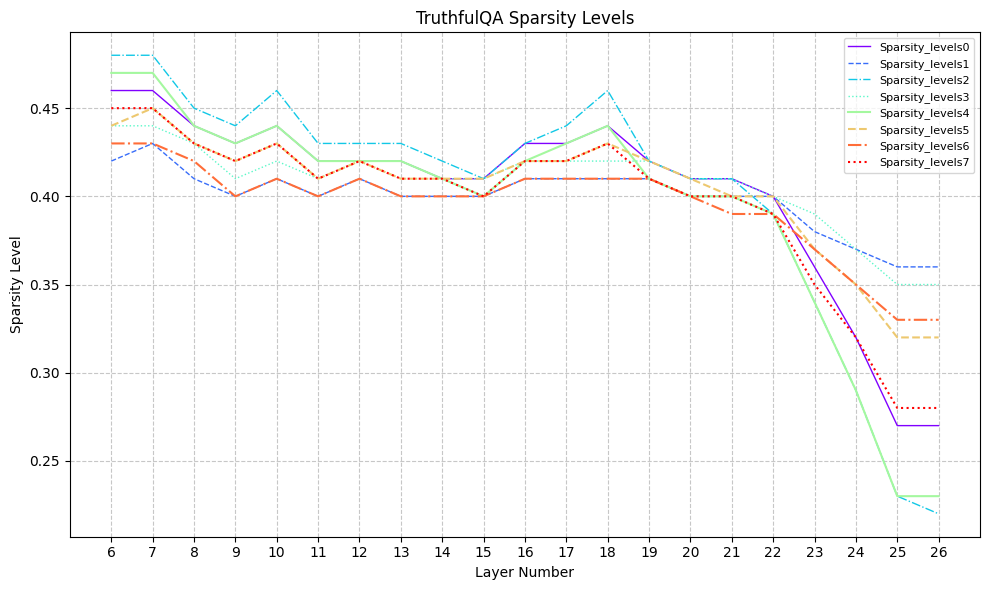

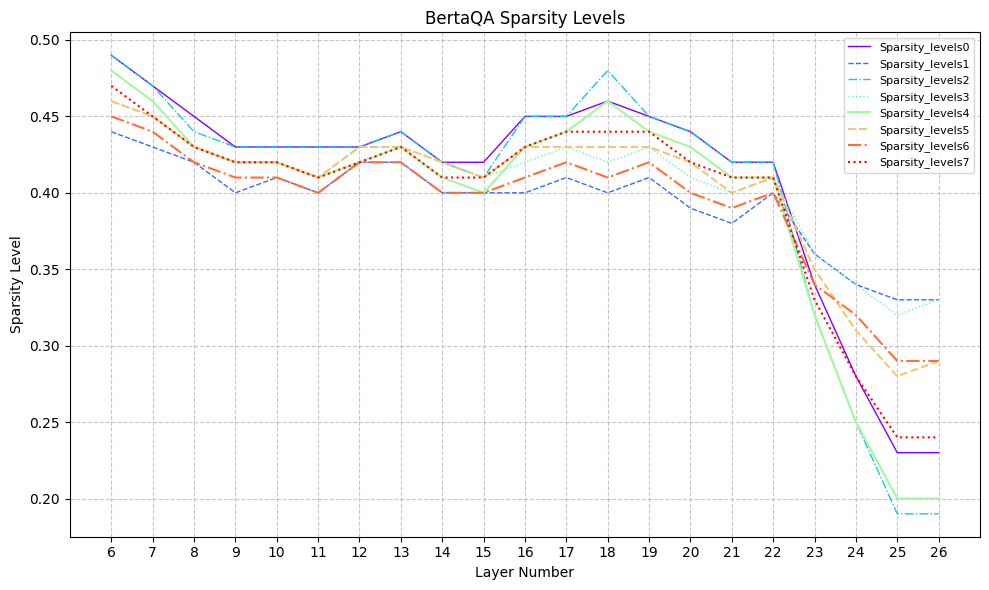

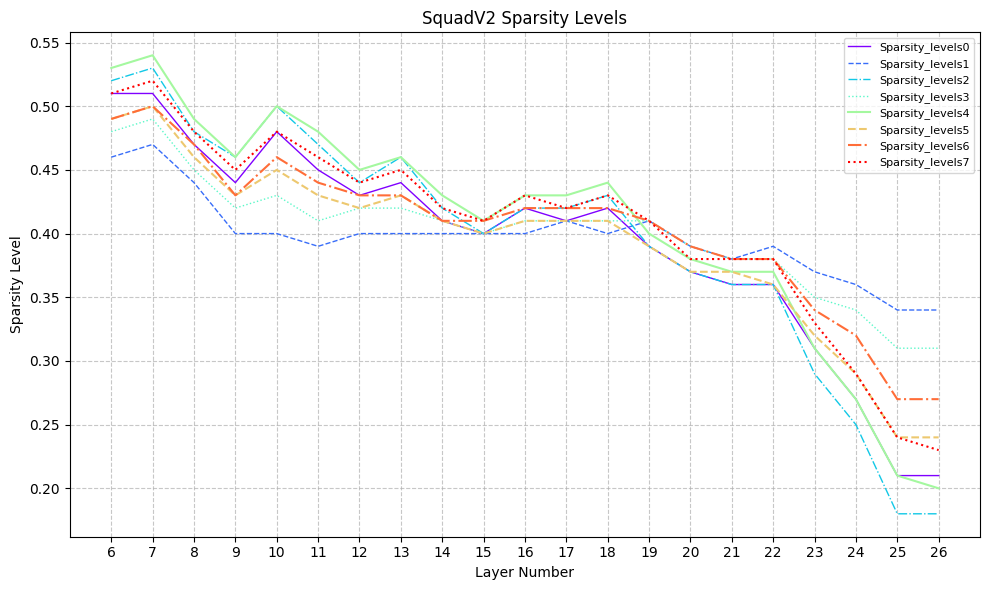

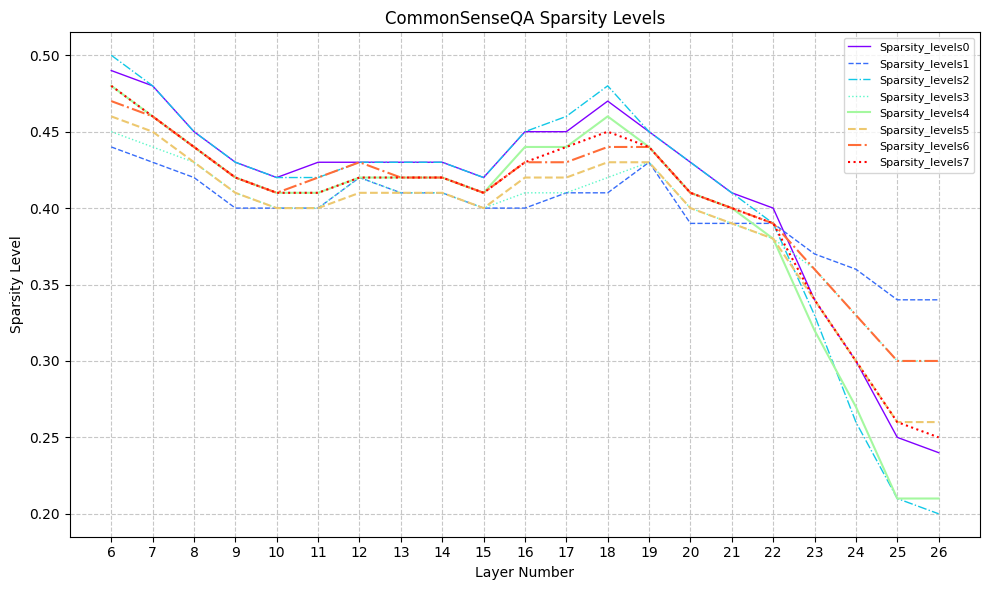

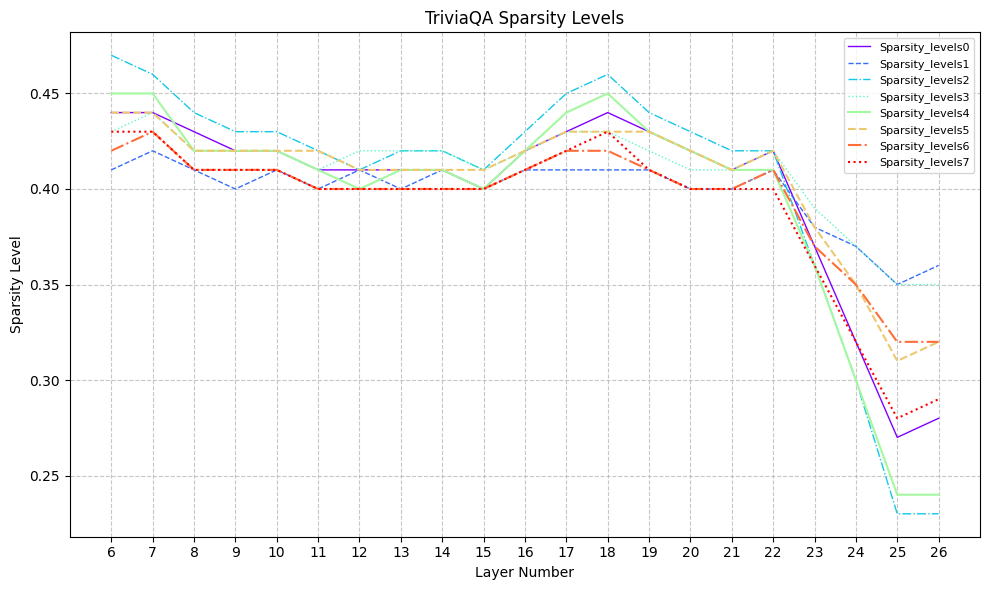

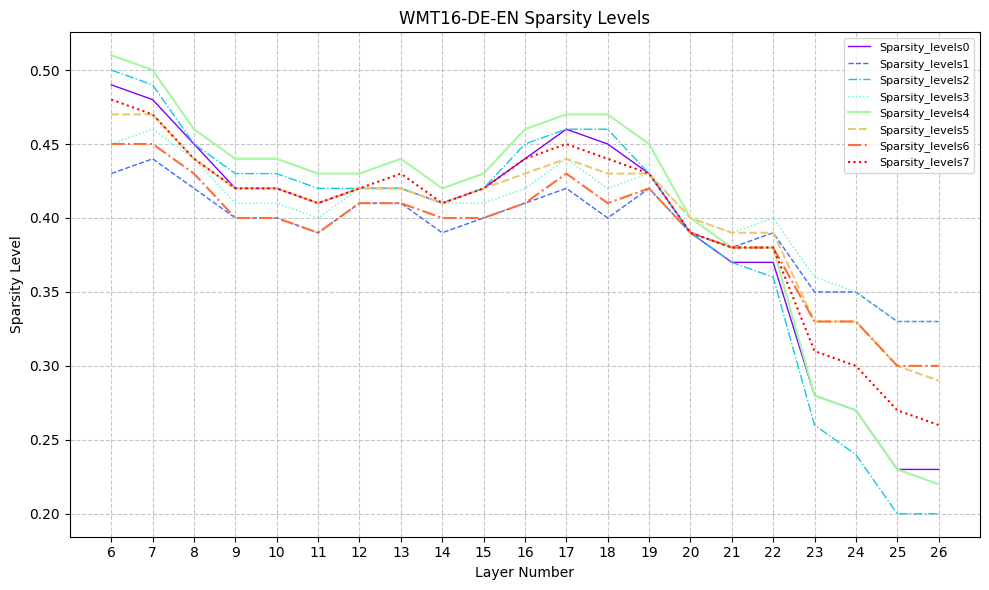

In [4]:
draw_levels(sparsity_levels, "TruthfulQA")
draw_levels(berta_qa_sparsity_levels, "BertaQA")
draw_levels(squadv2_sparsity_levels, "SquadV2")
draw_levels(commonsenseqa_sparsity_levels, "CommonSenseQA")
draw_levels(trivia_qa_sparsity_levels, "TriviaQA")
draw_levels(wmt_sparsity_levels, "WMT16-DE-EN")

### Compare Levels from different datasets

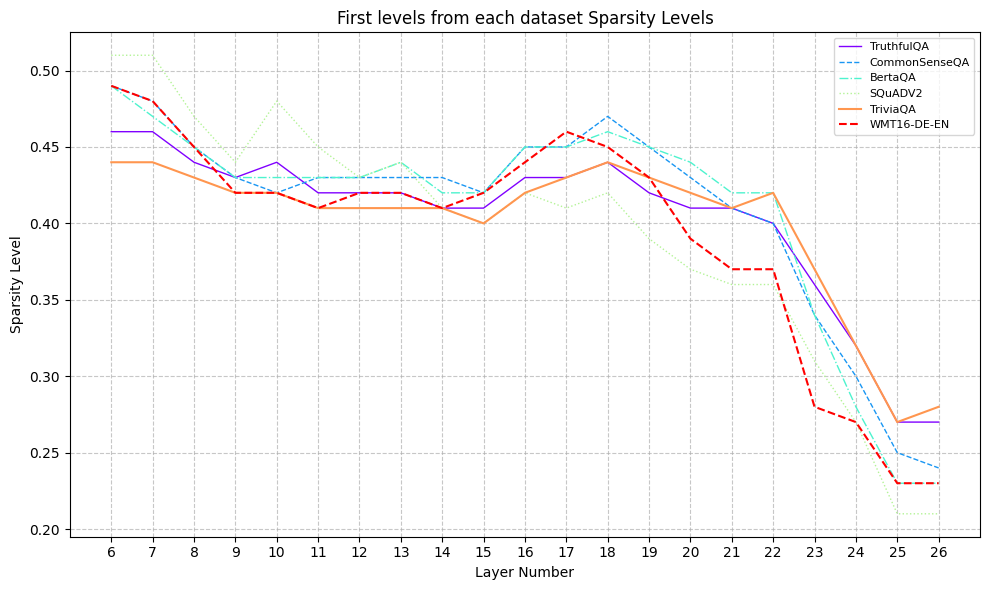

In [3]:
# Pick the first levels from each dataset
different_levels = [sparsity_levels[0], commonsenseqa_sparsity_levels[0], berta_qa_sparsity_levels[0], squadv2_sparsity_levels[0], trivia_qa_sparsity_levels[0], wmt_sparsity_levels[0]]
draw_levels(different_levels, "First levels from each dataset", ["TruthfulQA", "CommonSenseQA", "BertaQA", "SQuADV2", "TriviaQA", "WMT16-DE-EN"])

## Actual Sparsity

In [3]:
print_actual_sparsity(model_name, dir_path + "/lm_eval_results[:100]/indices_all.txt")


Task: commonsense_qa
sparsity_levels0.pkl: 0.39801897321428525
sparsity_levels1.pkl: 0.3951590401785716
sparsity_levels2.pkl: 0.4061221168154752
sparsity_levels3.pkl: 0.390869140625
sparsity_levels4.pkl: 0.3999314081101197
sparsity_levels5.pkl: 0.40947033110119
sparsity_levels6.pkl: 0.3937406994047619
sparsity_levels7.pkl: 0.4037504650297618

Task: bertaqa_en
sparsity_levels0.pkl: 0.3946823846726197
sparsity_levels1.pkl: 0.40707542782738027
sparsity_levels2.pkl: 0.3932524181547619
sparsity_levels3.pkl: 0.40278552827381
sparsity_levels4.pkl: 0.3975539434523803
sparsity_levels5.pkl: 0.40851702008928525
sparsity_levels6.pkl: 0.39374651227678525
sparsity_levels7.pkl: 0.4023263113839285

Task: truthfulqa_gen
sparsity_levels0.pkl: 0.3994431268601197
sparsity_levels1.pkl: 0.4080229259672618
sparsity_levels2.pkl: 0.3951590401785716
sparsity_levels3.pkl: 0.4042154947916666
sparsity_levels4.pkl: 0.3965890066964284
sparsity_levels5.pkl: 0.4032621837797618
sparsity_levels6.pkl: 0.3951706659226197